<a href="https://colab.research.google.com/github/AlejandroNunezArroyo/ARTIFICIAL-VISION/blob/main/Tutorial_6.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Tutorial 6: Canny Edge Detection

The Canny edge detector is an edge detection operator that uses a multi-stage algorithm to detect a wide range of edges in images. It was developed by John F. Canny in 1986 and it is widely used by computer vision professionals because of its efficiency removing noise, detecting and standardising edges. On the other hand, there are many methods that came up in later years but just a few are that known as the Canny Edge Detector. 

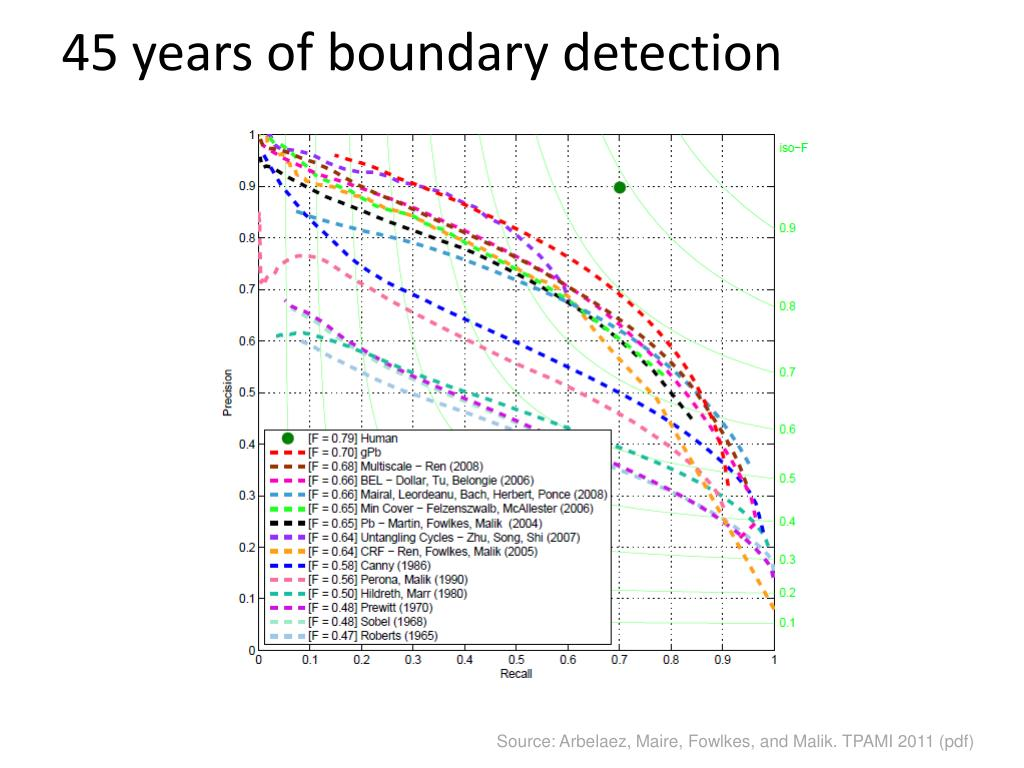

The Process of Canny edge detection algorithm can be broken down to 4 different steps:

1. Apply Gaussian filter to smooth the image in order to remove the noise
2. Apply sobel filters
3. Apply non-maximum suppression to get rid of spurious response to edge detection.
Apply double threshold to determine potential edges.
4. Track edge by hysteresis: Finalize the detection of edges by suppressing all the other edges that are weak and not connected to strong edges.

## Import the libraries

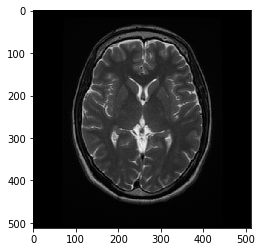

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import cv2

%matplotlib inline

# Read in the image
image = cv2.imread('images/brain_MR.jpg')

# Change color to RGB (from BGR)
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

plt.imshow(image)

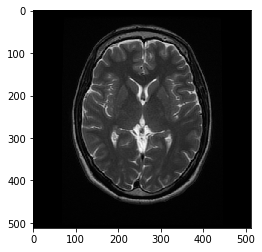

In [ ]:
# Convert the image to grayscale for processing
gray = cv2.cvtColor(image, cv2.COLOR_RGB2GRAY)

plt.imshow(gray, cmap='gray')

## Implement Canny edge detection

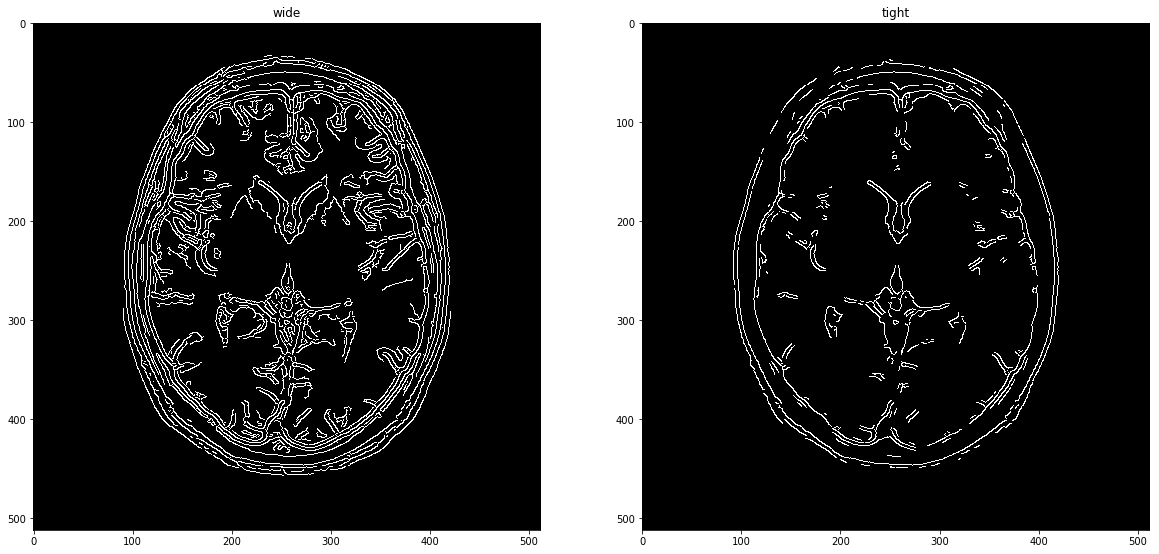

In [ ]:
# Try Canny using "wide" and "tight" thresholds

wide = cv2.Canny(gray, 30, 100)
tight = cv2.Canny(gray, 200, 240)
    
# Display the images
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(20,10))

ax1.set_title('wide')
ax1.imshow(wide, cmap='gray')

ax2.set_title('tight')
ax2.imshow(tight, cmap='gray')

### Exercise 1: Apply low-pass filtering first 
Now, use a noised image and make sure that the image is low-pass filtered before passing it on to the Canny function. You can always use another low-pass filter beforehand if it's required for your input image. Important, evaluate and describe the results when you implement uniquely canny vs when you implement an additional low-passfilter + canny. 

Load and plot image

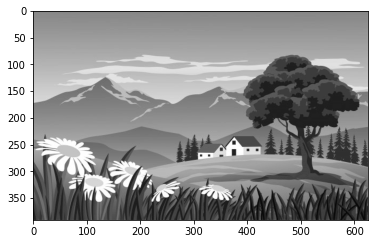

In [5]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

import cv2
import numpy as np

%matplotlib inline

# Read in the image
image = mpimg.imread('image_example1.jpg')

# Convert to grayscale for filtering
gray = cv2.cvtColor(image, cv2.COLOR_RGB2GRAY)

plt.imshow(gray, cmap="gray")

adding s&p noisse 

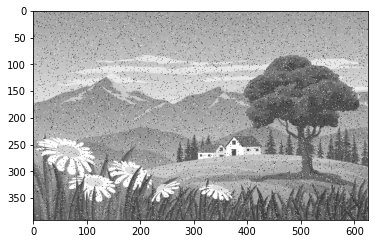

In [6]:
from skimage.util import random_noise

# Adding gaussian noise in the image with scikit-learn
# parameters: an image, type of noise (options: "gaussian", "pepper", "s&p"), 
# Variance of random distribution
noise_img = random_noise(gray, mode='s&p')
plt.imshow(noise_img, cmap="gray")

adding median filter

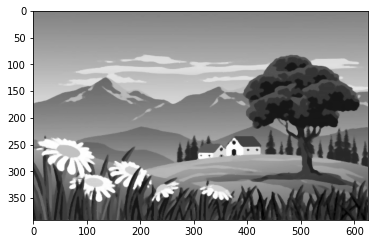

In [7]:
median = cv2.medianBlur(np.float32(noise_img),5)
plt.imshow(median, cmap="gray")

Canny

In [8]:
wide_a = 30  #@param {type: "slider", min: 0, max: 400}
wide_b = 120  #@param {type: "slider", min: 0, max: 400}
tight_a = 260  #@param {type: "slider", min: 0, max: 400}
tight_b = 350  #@param {type: "slider", min: 0, max: 400}

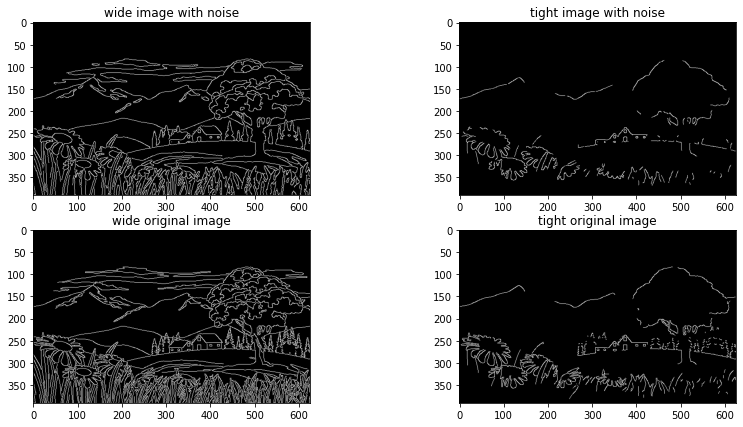

In [9]:
# Try Canny using "wide" and "tight" thresholds

wide = cv2.Canny((median*255).astype(np.uint8), wide_a, wide_b)
tight = cv2.Canny((median*255).astype(np.uint8), tight_a, tight_b)

wide_original = cv2.Canny((gray*255).astype(np.uint8), wide_a, wide_b)
tight_original = cv2.Canny((gray*255).astype(np.uint8), tight_a, tight_b)
    
# Display the images
# f, (ax1, ax2) = plt.subplots(1, 2, figsize=(14,7))
f, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2 , 2, figsize=(14,7))

ax1.set_title('wide image with noise')
ax1.imshow(wide, cmap='gray')

ax2.set_title('tight image with noise')
ax2.imshow(tight, cmap='gray')

ax3.set_title('wide original image')
ax3.imshow(wide_original, cmap='gray')

ax4.set_title('tight original image')
ax4.imshow(tight_original, cmap='gray')

To make the comparison between an original image vs. an image with noise using the Canny method, the Salt and pepper noise and the Mean Filter were used. Making a comparison between them and using the same limit values we can observe a slight change between the images, the smallest details of the image disappeared in the image with noise and they are more detailed in the original image since implementing any filter even if it has an approximation to the original image, it will not be the same.

### Exercise 2: Try to find the edges of a picture

Do you remember the Exercise 2 of the previous tutorial? Implement canny edge detection and compare the previous results of the CT scan of the patient. Finally, Define lower and upper thresholds for hysteresis and display the difference. How is the performance of canny edge detection? 

## Import the libraries

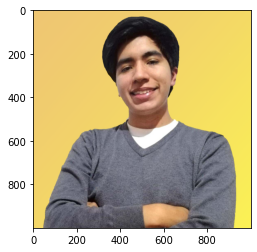

In [78]:
import numpy as np
import matplotlib.pyplot as plt
import cv2

%matplotlib inline

# Read in the image
image = cv2.imread('ale_nunez.png')

# Change color to RGB (from BGR)
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

plt.imshow(image)

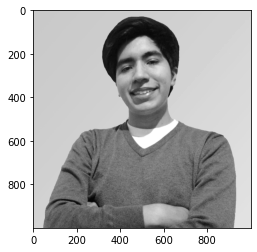

In [79]:
# Convert the image to grayscale for processing
gray = cv2.cvtColor(image, cv2.COLOR_RGB2GRAY)

plt.imshow(gray, cmap='gray')

## Implement Canny edge detection

In [86]:
wide_a = 30  #@param {type: "slider", min: 0, max: 400}
wide_b = 120  #@param {type: "slider", min: 0, max: 400}
tight_a = 219  #@param {type: "slider", min: 0, max: 400}
tight_b = 350  #@param {type: "slider", min: 0, max: 400}

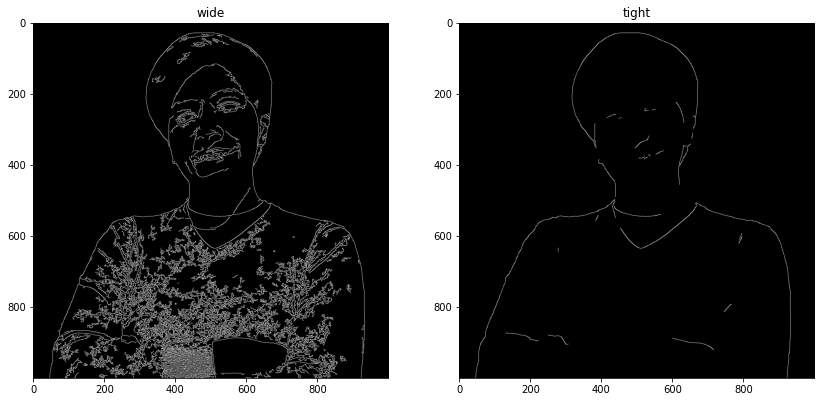

In [87]:
# Try Canny using "wide" and "tight" thresholds

wide = cv2.Canny(gray, wide_a, wide_b)
tight = cv2.Canny(gray, tight_a, tight_b)
    
# Display the images
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(14,7))

ax1.set_title('wide')
ax1.imshow(wide, cmap='gray')

ax2.set_title('tight')
ax2.imshow(tight, cmap='gray')

Comparing the result of the image in comparison to the results previously obtained, there is a big difference since the Canny method allows us to segment and filter the edges in a better way, since we choose the limits and according to that we do the filtering, unlike other methods in which the kernel matrix and its values must be varied, which makes it difficult to calibrate to obtain the best results. 